In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set(style='whitegrid', font_scale=0.9, rc={"lines.linewidth": 1.4,
                                           'lines.markersize': 1.6}, font="serif")

# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size

In [3]:
import numpy as np
from maszcal.data.sims import NBatta2010

In [4]:
DATA_DIR = '../data/NBatta2010/single-mass-bin-fits/'

In [5]:
nbatta_sims = NBatta2010('../data/NBatta2010/').cut_radii(0.1, 60)

In [6]:
zs = nbatta_sims.redshifts
rs = nbatta_sims.radii
wl_signals = nbatta_sims.wl_signals

z_colors = ['#e25f5e', '#e16435', '#cb8149', '#e09f2c', '#c2a850', '#bac84b', '#73983e',
            '#67c350', '#5ec681', '#44caaf', '#38b3eb', '#4c95dd', '#2c87f7', '#688cdc']

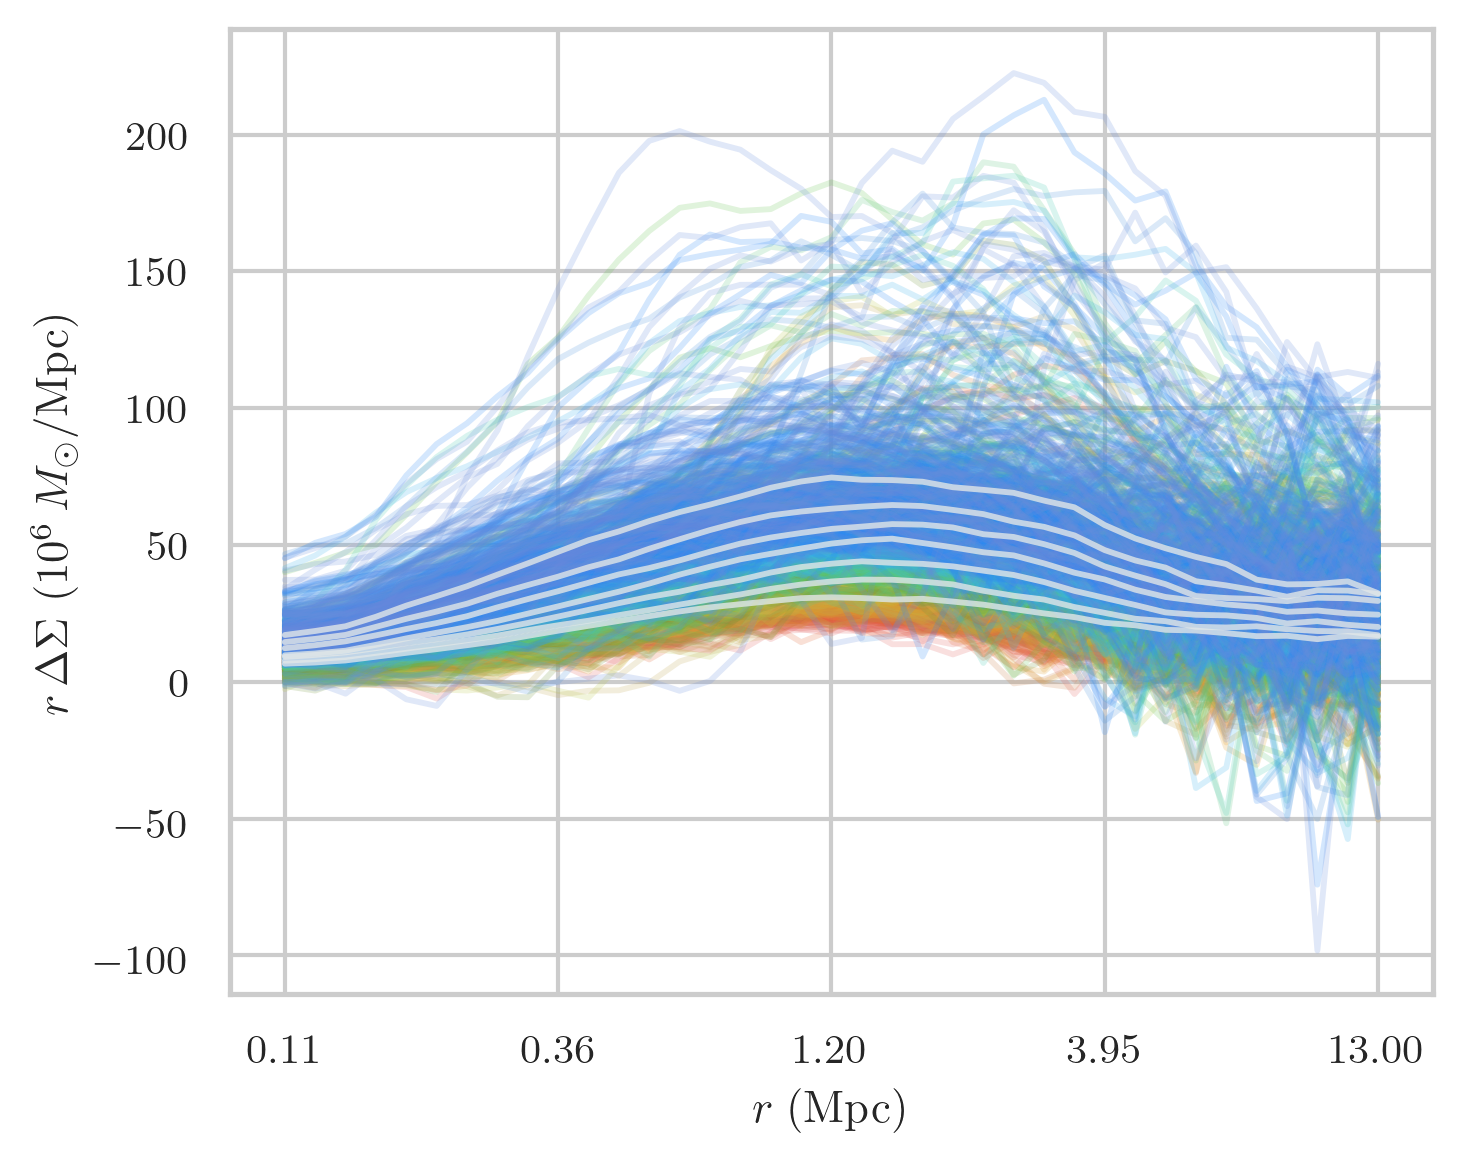

In [7]:
LOWER_BOUND = 0.1
UPPER_BOUND = 5
for i, z in enumerate(zs):
    plt.plot(rs, rs[:, None]*wl_signals[:, i, :], color=z_colors[i], alpha=0.2)

for i in range(0, zs.size, 2):
    plt.plot(rs, (rs[:, None]*wl_signals[:, i, :]).mean(axis=1),
             color='#e1e7e8', alpha=0.8, linestyle='-', marker='')
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$r \; (\mathrm{Mpc})$')
plt.ylabel(r'$r \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

#plt.axvline(x=LOWER_BOUND, color='black')
#plt.axvline(x=UPPER_BOUND, color='black')

plt.gcf().set_size_inches(5, 4)

#plt.savefig('misc/a-exam_sim_data_full.pdf', bbox_inches='tight')
pass

In [8]:
colors = ['#c37834', '#4b9cc6', '#7a9e38', '#c2605c', '#629966']

In [9]:
rng = np.random.default_rng(13)

In [10]:
rand_idx = rng.integers(0, wl_signals[0].size, 100) 

In [11]:
wl_rands = wl_signals.reshape(rs.size, -1)[:, rand_idx]

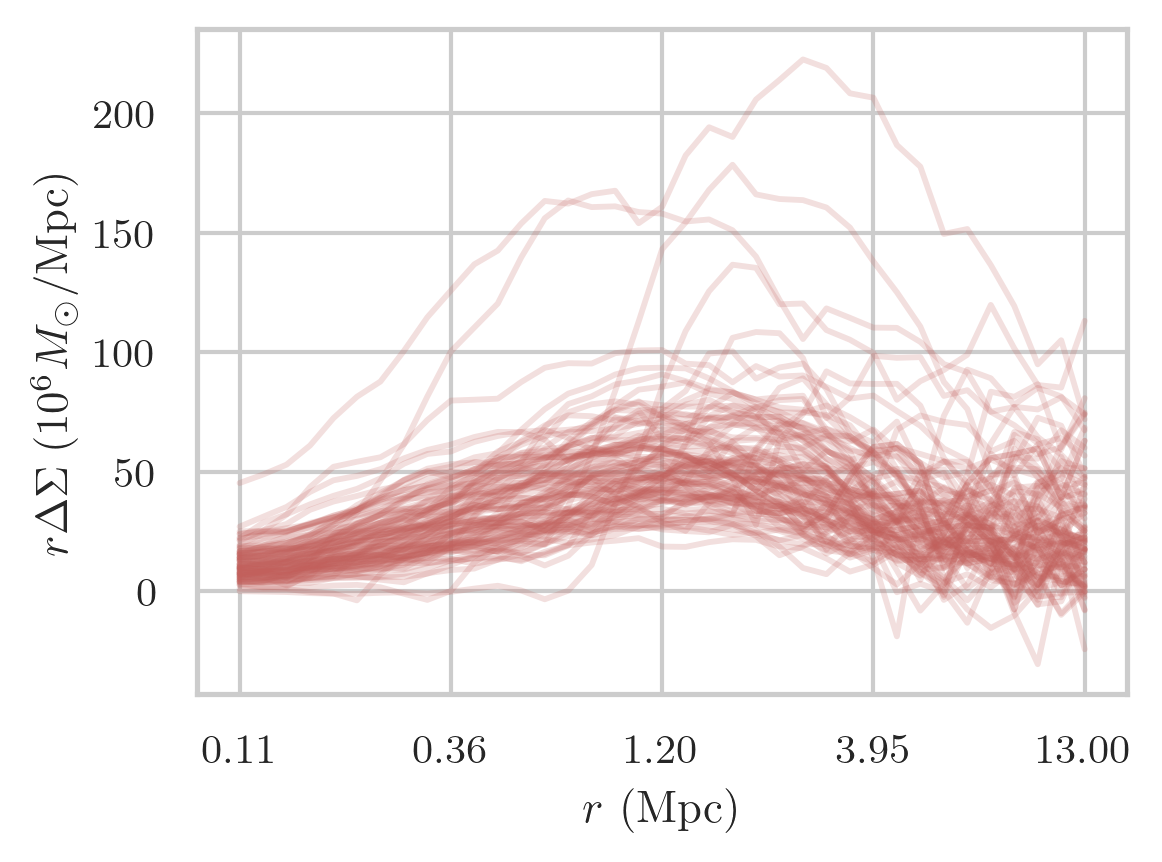

In [12]:
plt.plot(rs, rs[:, None]*wl_rands, color=colors[3], alpha=0.2)

plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.gcf().set_size_inches(4, 3)
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$r \Delta \Sigma \; (10^6 M_\odot/\mathrm{Mpc})$')

plt.savefig('../figs/sims/NBatta2010/data/sim_data_random_100.pdf', bbox_inches='tight')
pass

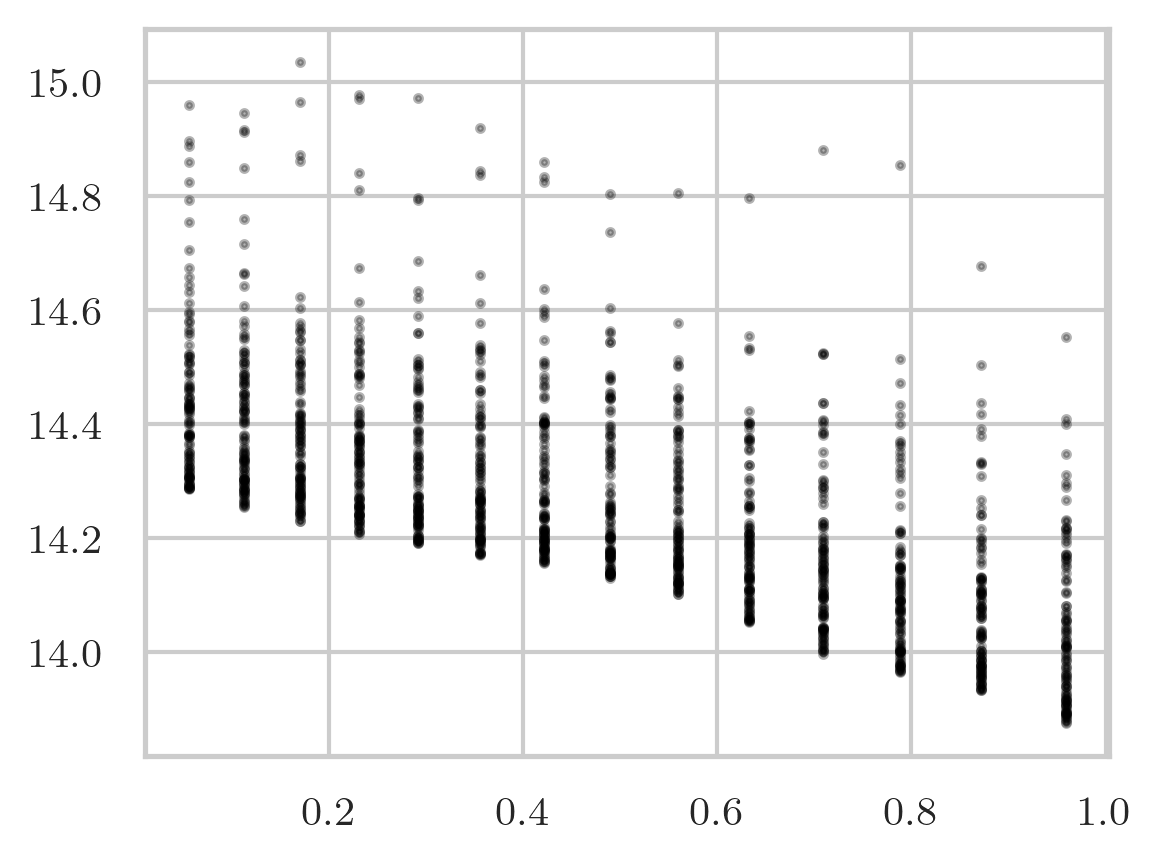

In [13]:
#plt.plot(zs, nbatta_sims.masses.min(axis=1)/1e14, marker='_', linestyle='', markersize=4)
#plt.plot(zs, nbatta_sims.masses.max(axis=1)/1e14, marker='_', linestyle='', markersize=4)
plt.plot(zs, np.log10(nbatta_sims.masses), linestyle='', color='black', alpha=0.3, marker='o')
plt.gcf().set_size_inches(4, 3)
pass

In [14]:
import pandas as pd

In [15]:
ms = nbatta_sims.masses

cluster_df = pd.DataFrame(
    {
        'mass': ms.flatten(),
        'log10mass': np.log10(ms.flatten()),
        'redshift': np.repeat(zs.round(2), 100),
    }
)

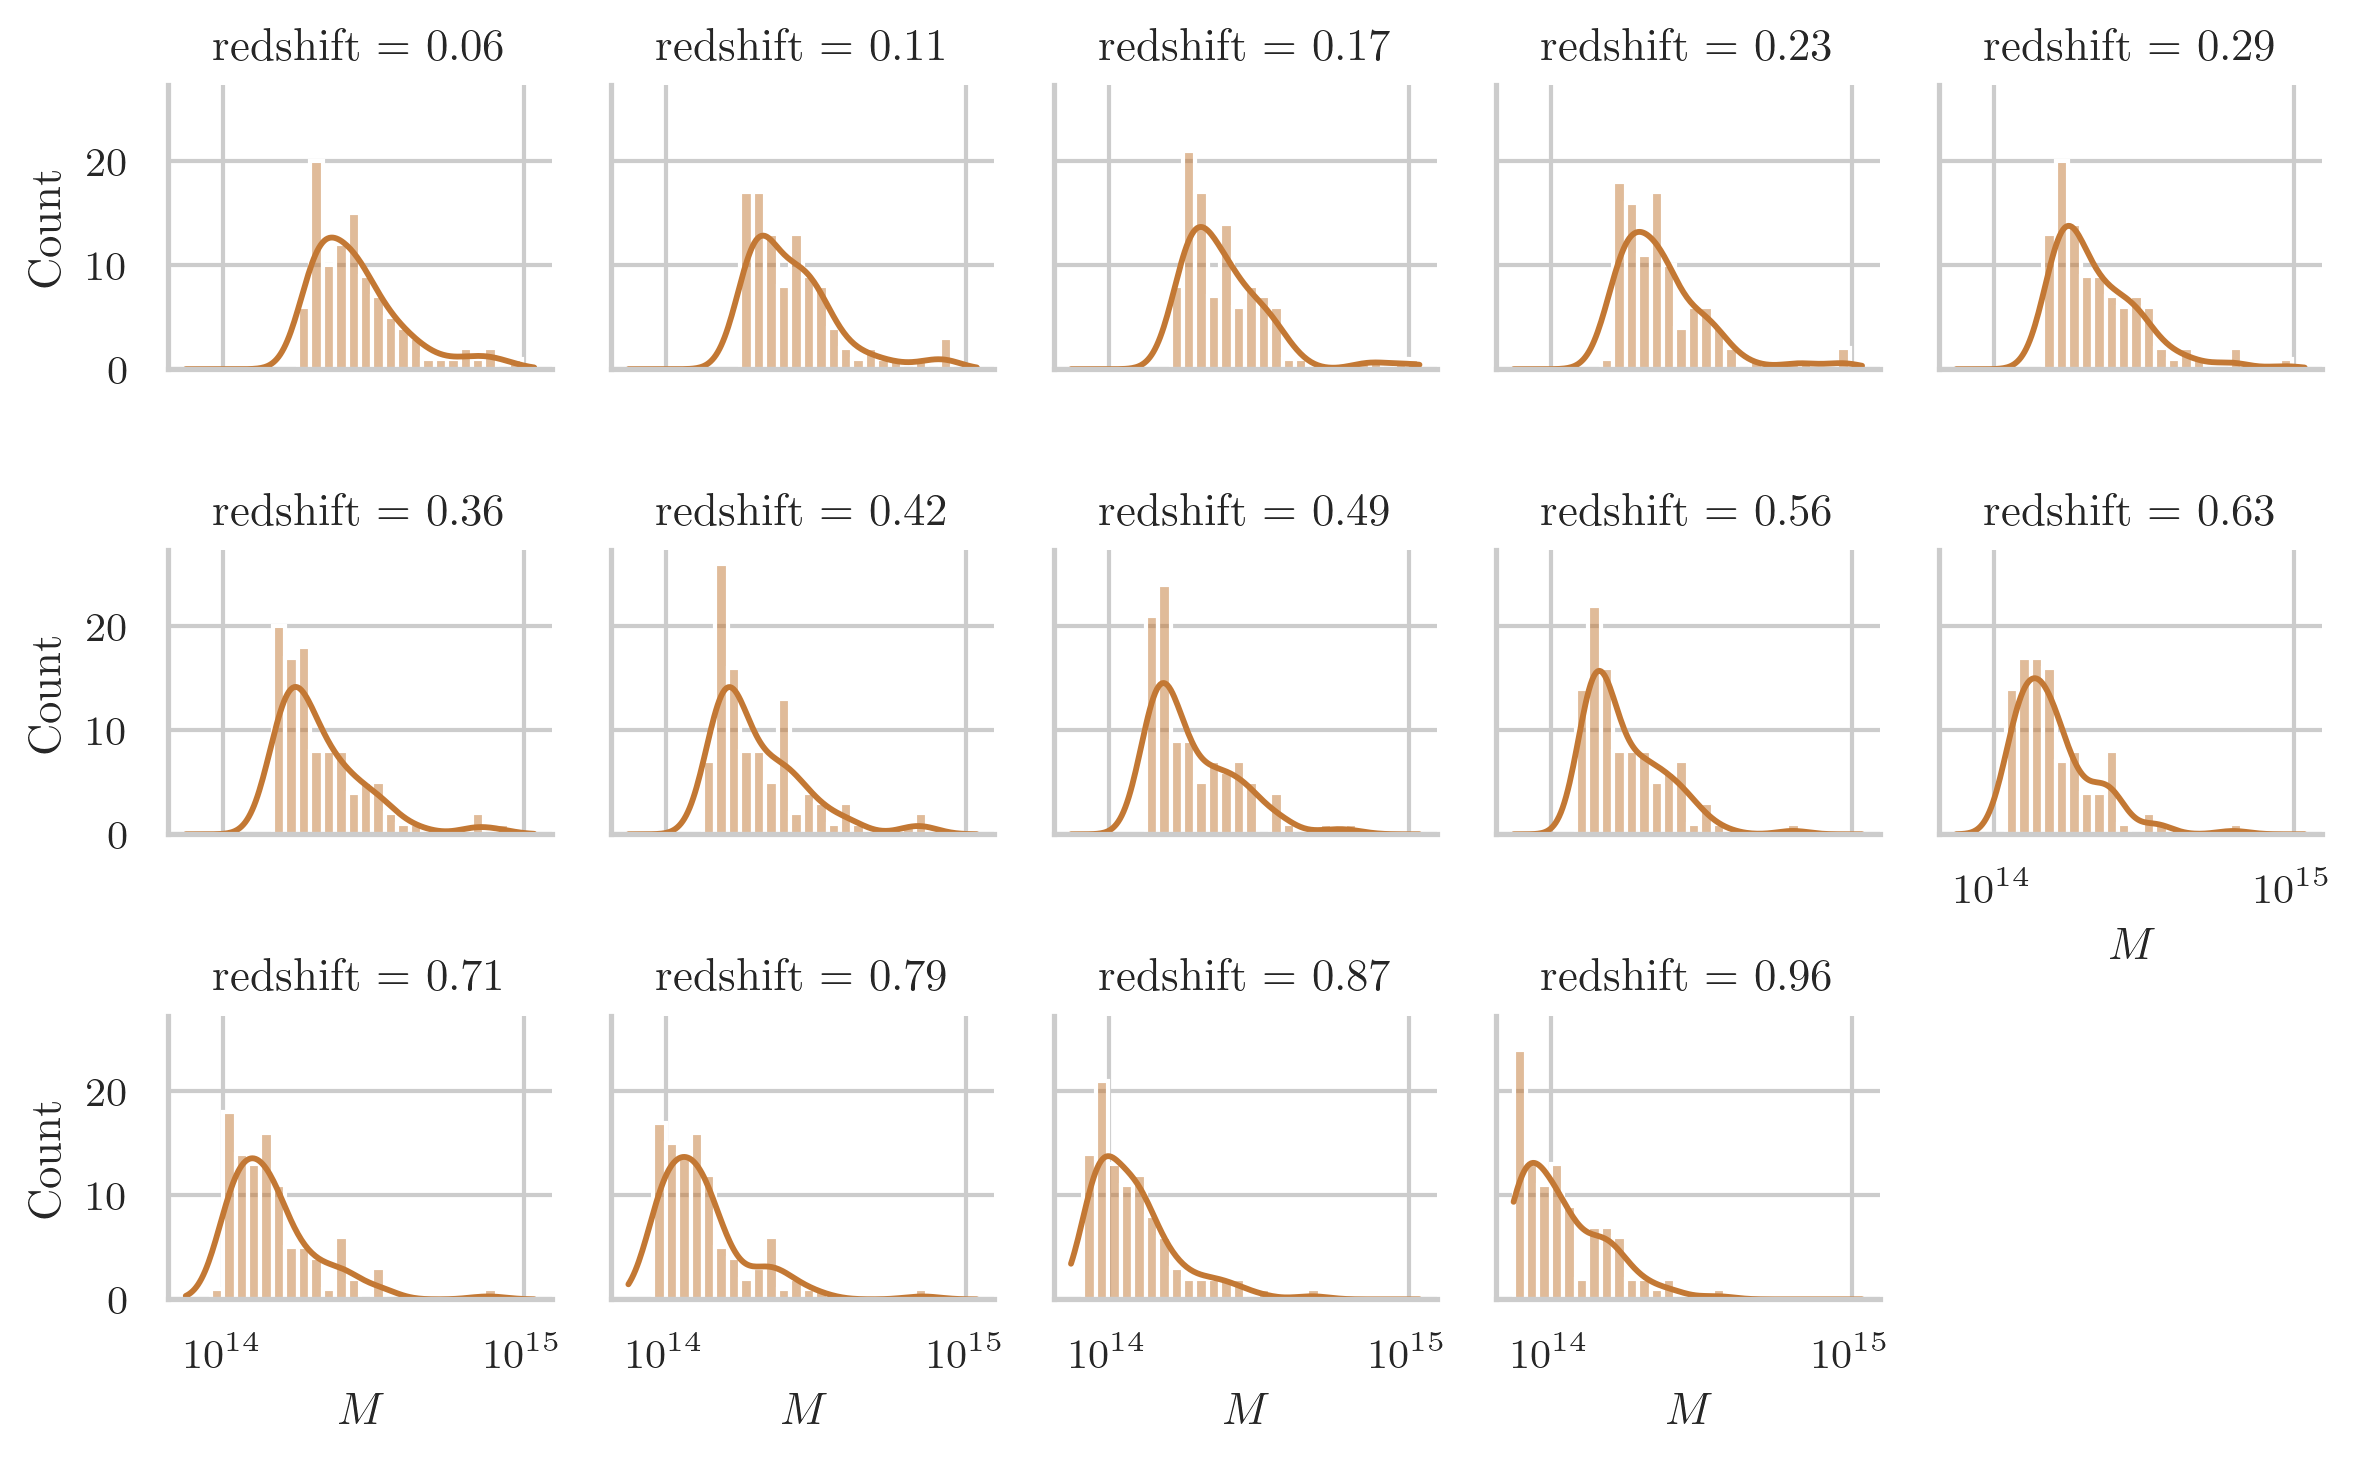

In [16]:
g = sns.displot(x='mass', col='redshift', data=cluster_df,
                col_wrap=5, kind='hist', log_scale=True, color=colors[0], kde=True)
g.set_axis_labels(r'$M$', 'Count')
plt.gcf().set_size_inches(8, 5)
plt.savefig('../figs/sims/NBatta2010/data/sim_mass_distributions.pdf', bbox_inches='tight')

<AxesSubplot:>

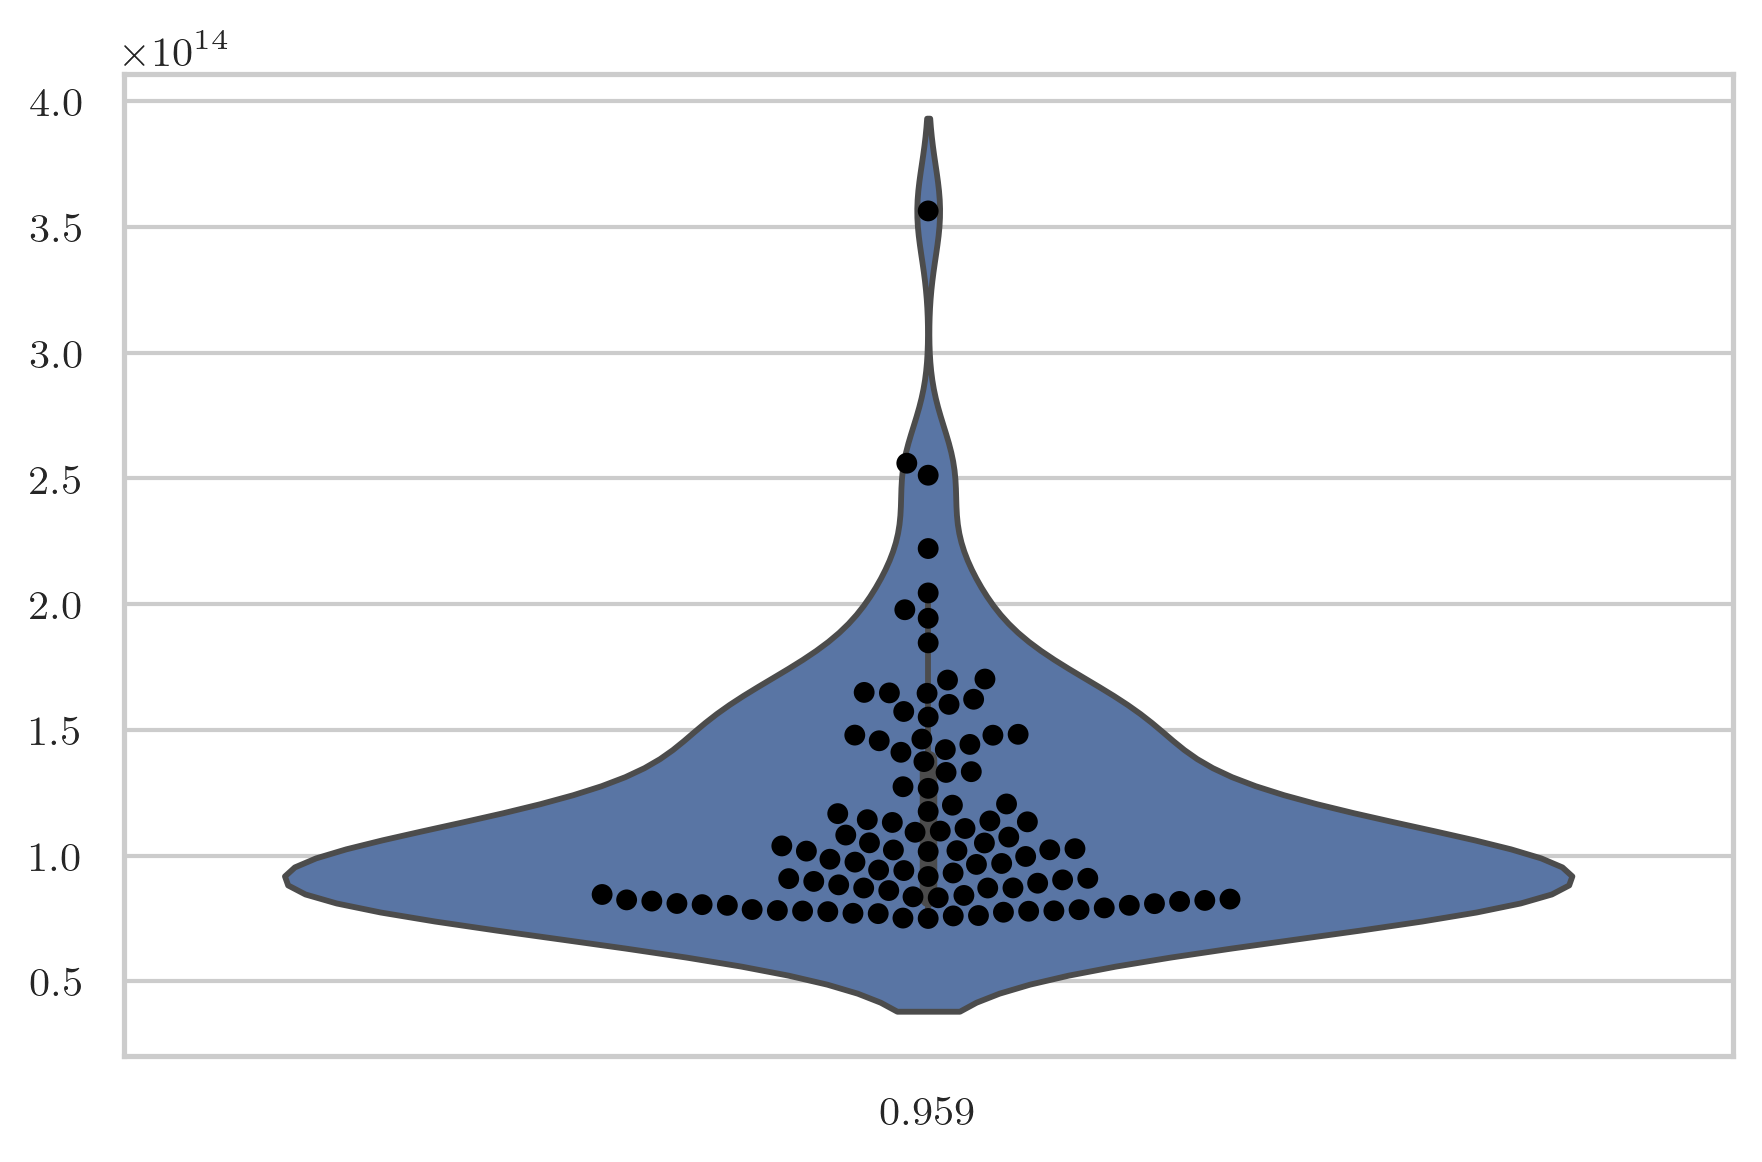

In [18]:
ms = nbatta_sims.masses[0, :]
zs_ = round(zs[0], 3) * np.ones_like(ms)
sns.violinplot(x=zs_, y=ms)
sns.swarmplot(x=zs_, y=ms, color='black')

In [19]:
nbatta_sims.masses.max(axis=1)/1e14

array([ 3.5640152 ,  4.7546147 ,  7.14779933,  7.61075788,  6.2676592 ,
        6.38361191,  6.35228012,  7.25774244,  8.31623109,  9.37253937,
        9.48670632, 10.84339454,  8.848195  ,  9.11207444])

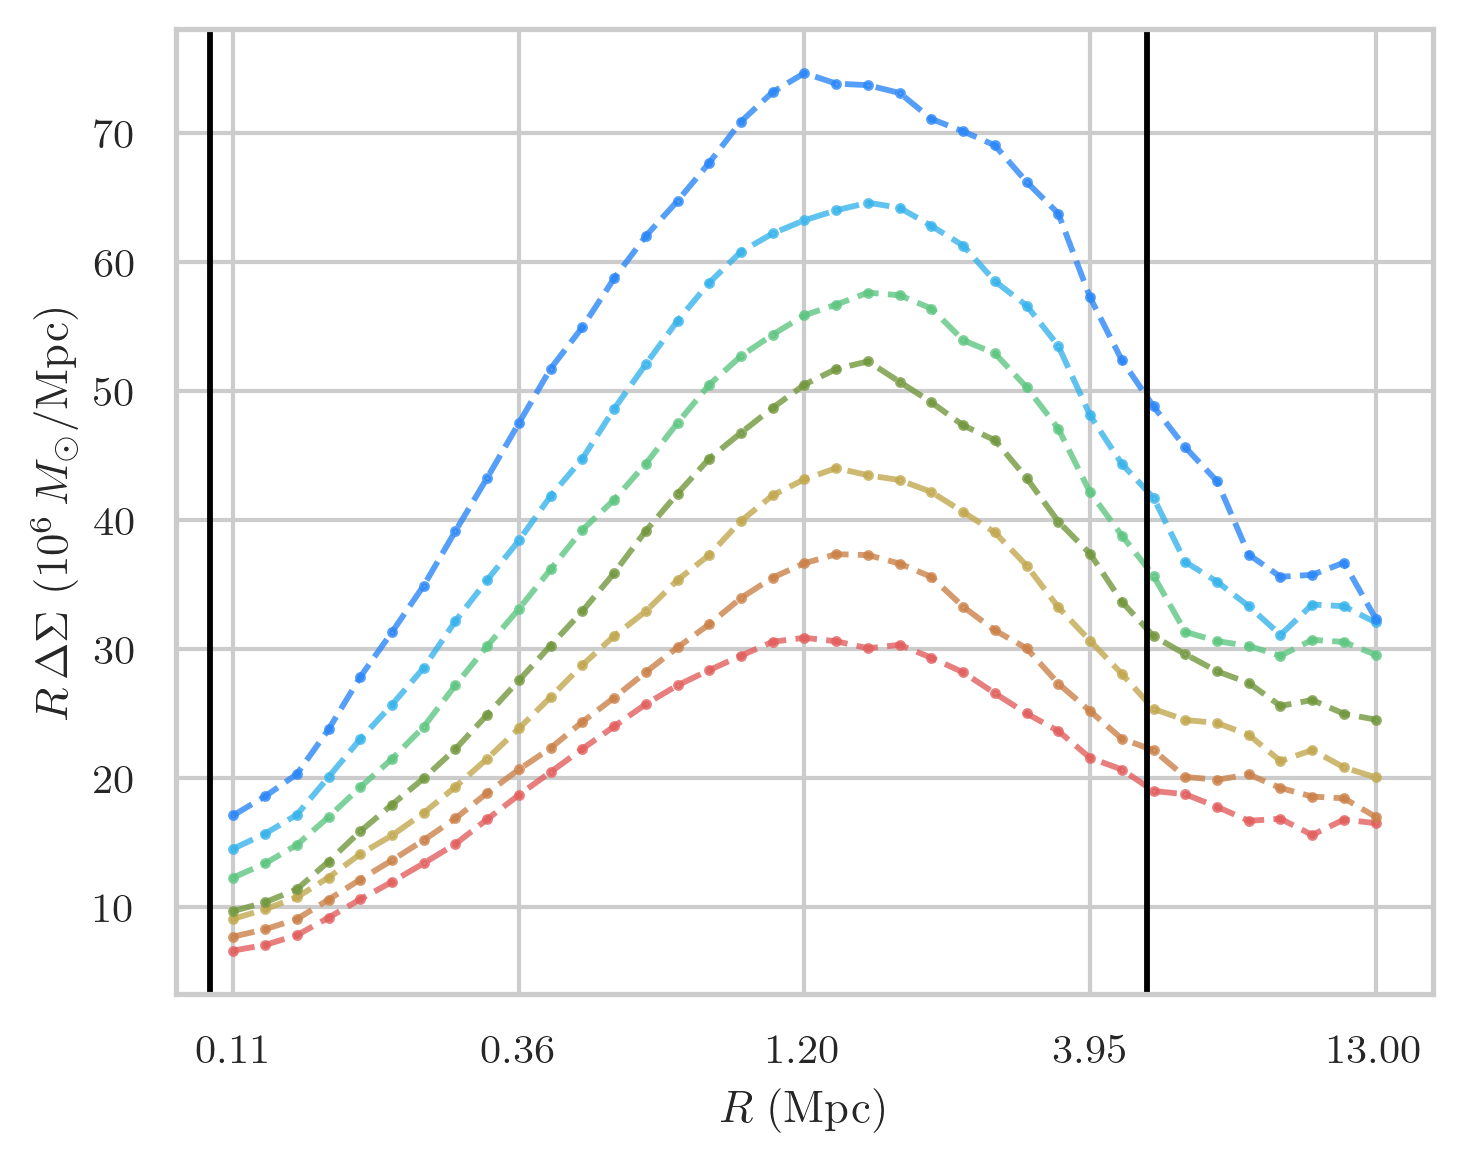

In [20]:
for i in range(0, zs.size, 2):
    plt.plot(rs, (rs[:, None]*wl_signals[:, i, :]).mean(axis=1),
             color=z_colors[i], alpha=0.8, linestyle='--', marker='o')
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$R \; (\mathrm{Mpc})$')
plt.ylabel(r'$R \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

plt.axvline(x=LOWER_BOUND, color='black')
plt.axvline(x=UPPER_BOUND, color='black')

plt.gcf().set_size_inches(5, 4)

In [21]:
r_wl_mean = rs*wl_signals.mean(axis=(1, 2))
r_wl_std = (rs[:, None, None]*wl_signals).std(axis=(1, 2))

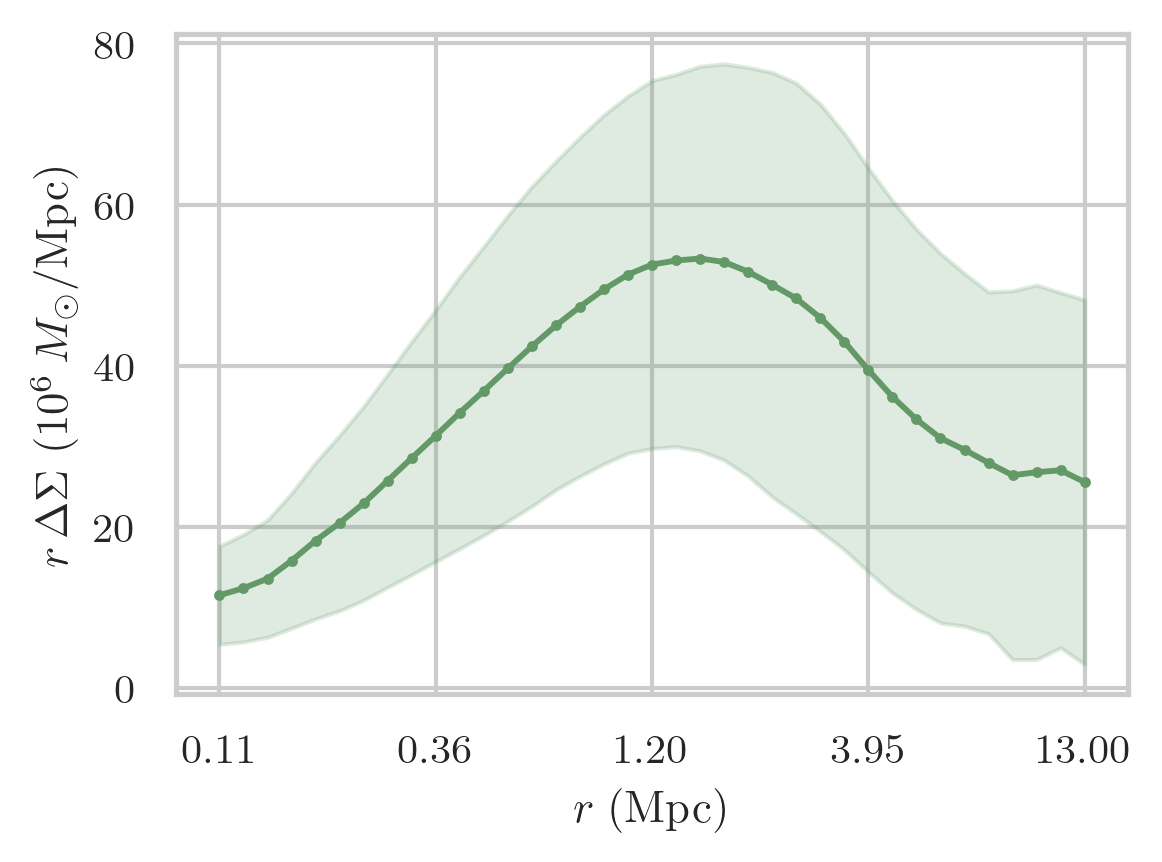

In [24]:
plt.plot(rs, r_wl_mean, color=colors[-1], alpha=1, linestyle='-', marker='o')
plt.fill_between(
    rs, 
    r_wl_mean-r_wl_std,
    r_wl_mean+r_wl_std,
    color=colors[-1], 
    alpha=0.2, 
)
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$r \; (\mathrm{Mpc})$')
plt.ylabel(r'$r \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

#plt.axvline(x=LOWER_BOUND, color='black')
#plt.axvline(x=UPPER_BOUND, color='black')


plt.gcf().set_size_inches(4, 3)
plt.savefig('../figs/sims/NBatta2010/data/sims_stacked.pdf', bbox_inches='tight')


In [26]:
mass_sorted_indices = nbatta_sims.masses.argsort(axis=1)

In [27]:
zs = nbatta_sims.redshifts
sorted_masses = np.array([nbatta_sims.masses[i, mass_sorted_indices[i]] for i in range(zs.size)])

In [28]:
assert np.all(np.isin(sorted_masses, nbatta_sims.masses))
assert np.all(np.isin(nbatta_sims.masses, sorted_masses))

In [29]:
sorted_wls = np.moveaxis(
    np.array([nbatta_sims.wl_signals[:, i, mass_sorted_indices[i]] for i in range(zs.size)]),
    0,
    1,
)

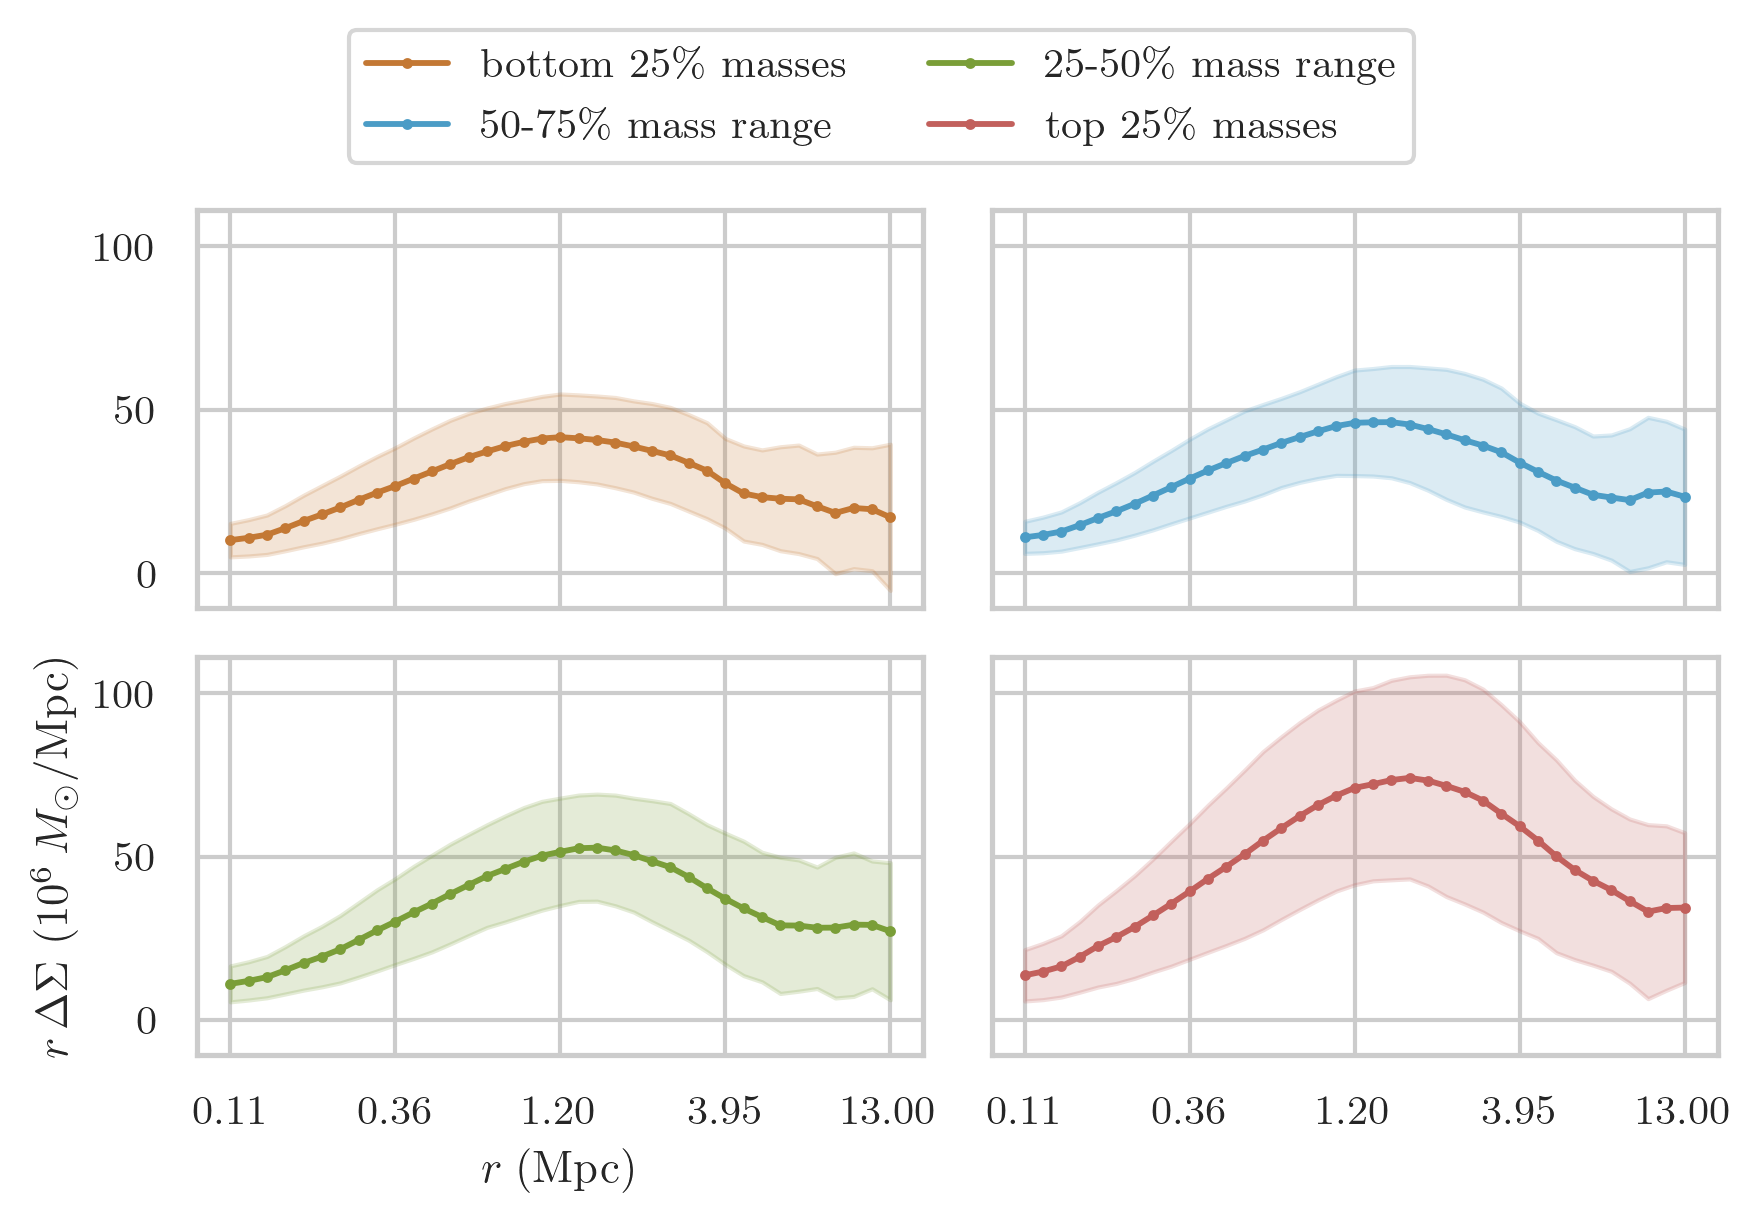

In [32]:
#plt.axvline(x=LOWER_BOUND, color='grey')
#plt.axvline(x=UPPER_BOUND, color='grey')
#plt.plot(rs, rs*sorted_wls.mean(axis=(1, 2)), alpha=0.8, linestyle='-', marker='o')

num_masses = sorted_masses.shape[1]
num_mass_bins = 4
mass_bin_size = num_masses//num_mass_bins

labels = ['top 25\% masses', '25-50\% mass range', '50-75\% mass range', 'bottom 25\% masses'][::-1]
fig, axes = plt.subplots(2, 2, sharex='col', sharey=True)

for i, ax in enumerate(axes.flat):
    lower_idx = i*mass_bin_size
    upper_idx = (i+1) * mass_bin_size
    wl_sorted_mean = rs*sorted_wls[:, :, lower_idx:upper_idx].mean(axis=(1, 2))
    wl_sorted_std = rs*sorted_wls[:, :, lower_idx:upper_idx].std(axis=(1, 2))
    ax.plot(rs, wl_sorted_mean, linestyle='-', marker='o', label=labels[i], color=colors[i])
    ax.fill_between(rs, wl_sorted_mean-wl_sorted_std, wl_sorted_mean+wl_sorted_std,
                    alpha=0.2, color=colors[i])
    
    ax.set_xscale('log')
    ax.set_xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    
axes.flat[2].set_xlabel(r'$r \; (\mathrm{Mpc})$')
axes.flat[2].set_ylabel(r'$r \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

fig.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0.98))



plt.gcf().set_size_inches(6, 3.6)
plt.savefig('../figs/sims/NBatta2010/data/sims_stacked_in_mass_bins.pdf', bbox_inches='tight')
